In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the data into a Pandas dataframe
df = pd.read_csv('/content/labelled data (2).csv')

In [3]:
df

,Unnamed: 0,content,label
0,0,Researchers use deep learning to simulate chlo...,Positive
1,1,Why is our @Conservatives government so evil?\...,Negative
2,2,"Texas Oilfield Waste Company Contributed $53,7...",Negative
3,3,Epic California snowpack is now the deepest it...,Negative
4,4,If #climatechange is real and not a hoax why d...,Negative
...,...,...,...
558,558,"It's Feburary, which means we're counting down...",Neutral
559,559,.@IOTA promotes sustainable energy consumption...,Positive
560,560,Our patented #BatteryRecycling process is know...,Positive
561,561,"How do #urban shrinkage, degrowth, and #sustai...",Neutral


In [43]:
df['label'].value_counts()

Positive    261
Neutral     182
Negative    120
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

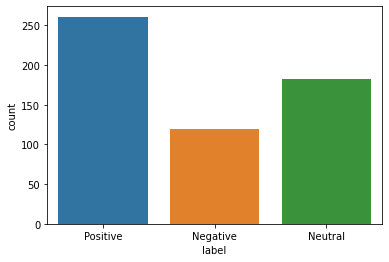

In [45]:
# Create a countplot of the labels
sns.countplot(x='label', data=df)

In [46]:
# Get indices of positive examples
positive_indices = df[df['label'] == 'Positive'].index

In [49]:
# Randomly select subset of positive examples
n_samples = len(positive_indices)
subset_indices = np.random.choice(positive_indices, size=n_samples//2, replace=False)


In [50]:
# Get indices of negative and neutral examples
negative_indices = df[df['label'] == 'Negative'].index
neutral_indices = df[df['label'] == 'Neutral'].index

In [51]:
# Concatenate subset of positive examples with all negative and neutral examples
df_undersampled = pd.concat([df.loc[subset_indices], df.loc[negative_indices], df.loc[neutral_indices]])

In [52]:
# Shuffle the rows of the new dataframe
df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True)

In [53]:
df_undersampled

,Unnamed: 0,content,label
0,121,Dangerous Fungi Are Spreading Across U.S. as T...,Negative
1,468,S.#Africa - #EnvironmentalJustice org. says in...,Positive
2,205,What does forest restoration in the U.S. South...,Negative
3,361,Nearly two years ago group of us gave a 2.5 ho...,Positive
4,501,Ongoing droughts in the West of the U.S. have ...,Negative
...,...,...,...
427,433,My car gets 50MPG. My lawn is organic. I'm try...,Positive
428,90,Nice Work Amazon!\n\nvia MarketWatch\n\n #amaz...,Neutral
429,553,"""We can't talk about #Sustainability without r...",Neutral
430,401,3/4 He takes shots at both sides of the aisle ...,Neutral


In [54]:
df_undersampled['label'].value_counts()

Neutral     182
Positive    130
Negative    120
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

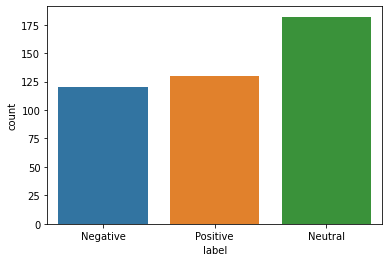

In [55]:
# Create a countplot of the labels
sns.countplot(x='label', data=df_undersampled)

In [4]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

In [56]:
# Fit and transform the text data
X = vectorizer.fit_transform(df_undersampled['content'])

In [7]:
X

<563x5025 sparse matrix of type '<class 'numpy.float64'>'
	with 15319 stored elements in Compressed Sparse Row format>

In [57]:
# Get the label data
y = df_undersampled['label']


In [58]:
y

0      Negative
1      Positive
2      Negative
3      Positive
4      Negative
         ...   
427    Positive
428     Neutral
429     Neutral
430     Neutral
431     Neutral
Name: label, Length: 432, dtype: object

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create a logistic regression model
clf = LogisticRegression()

In [61]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [62]:
# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_micro')

In [63]:
# Train the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1_micro')

In [64]:
# Get the best model from GridSearchCV
clf = grid_search.best_estimator_

In [65]:
# Train the model on the training data
#clf.fit(X_train, y_train)

In [66]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [67]:
y_pred

array(['Neutral', 'Neutral', 'Negative', 'Negative', 'Negative',
       'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral',
       'Neutral', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Negative', 'Negative', 'Positive', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral',
     

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# OR
print("Accuracy:",logreg.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

In [ ]:
logreg = LogisticRegression(C = 100.0, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

In [68]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [69]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision (micro):", precision)
print("Recall (micro):", recall)
print("Micro F1 score:", f1_micro)
print("Macro F1 score:", f1_macro)
print("Weighted F1 score:", f1_weighted)

Accuracy: 0.5402298850574713
Precision (micro): 0.5402298850574713
Recall (micro): 0.5402298850574713
Micro F1 score: 0.5402298850574713
Macro F1 score: 0.5161451321346637
Weighted F1 score: 0.5286821214378655


In [70]:
from sklearn.metrics import classification_report

# assuming y_true and y_pred are arrays of true and predicted labels respectively
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

    Negative       0.50      0.29      0.37        24
     Neutral       0.46      0.79      0.58        33
    Positive       0.82      0.47      0.60        30

    accuracy                           0.54        87
   macro avg       0.60      0.52      0.52        87
weighted avg       0.60      0.54      0.53        87

